# D: Random Numbers

This notebook discusses aspects of random number generation including seeds.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1 Fixing Seed, fixes Random Numbers

Create two sets of random numbers with the same seed(1234567) and plot them on top of each other. As identical sets of random numbers are created with identical seeds, you will get two plots exactly on top of each other.

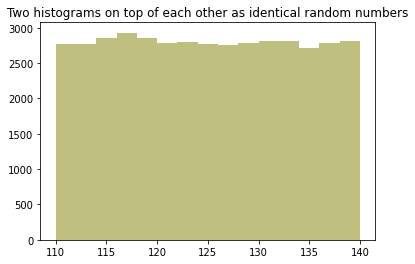

In [ ]:
np.random.seed(seed=1234567)                                            #set the seed of the random number generator to 1234567
Base = 110 + 30* np.random.rand(42000)                                  #generate 42000 random numbers between 110 and 140
plt.figure("On Top of Each Other")
plt.hist(Base, bins=15, range =(110,140), alpha = 0.5, color="blue")    #Plot the histogram for the first set

np.random.seed(seed=1234567)                                            #set the seed of the random number generator to 1234567 for the second set
Base2 = 110 + 30* np.random.rand(42000)                                 #Generate the second set of random numbers
plt.hist(Base2, bins=15, range =(110,140), alpha = 0.5, color="yellow") #Plot the histogram for the second set
plt.title("Two histograms on top of each other as identical random numbers")
plt.show()

## Part 2 Varying Seed (randomly) gives distinct results

Create two sets of random  numbers with different seeds and plot them on top of each other. Differences can be seen in the plot.

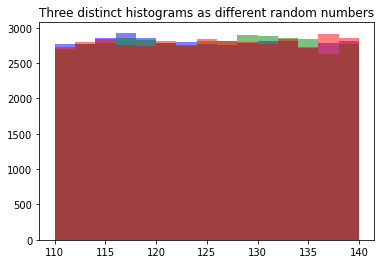

In [ ]:
plt.figure("Different")
np.random.seed(seed=1234567)                                            #set the seed of the random number generator to 1234567 for the first set of random numbers
Base4 = 110 + 30* np.random.rand(42000)                                 #Generate a set of 42000 random numbers between 110 and 140(first set)
plt.hist(Base4, bins=15, range =(110,140), alpha = 0.5, color="blue")   #plot histogram for the first set.
Base1 = 110 + 30* np.random.rand(42000)                                 #Generate the second set of 42000 numbers between 110 and 140. Note that for this set the seed set will depend on where the first set ends.
plt.hist(Base1, bins=15, range =(110,140), alpha = 0.5, color="green")  #Plot the histogram for the first seed set.
np.random.seed(seed=7654321)                                            #Set the seed value for the generator to be 7654321
Base3 = 110 + 30* np.random.rand(42000)                                 #Generate the third set of 42000 numbers between 110 and 140.
plt.hist(Base3, bins=15, range =(110,140), alpha = 0.5, color="red")    #Plot the third set.
plt.title("Three distinct histograms as different random numbers")
# For Agg backend
plt.show()